In [1]:
import os
os.listdir()


['.ipynb_checkpoints',
 'aadhaar_analysis.ipynb',
 'api_data_aadhar_biometric_0_500000.csv',
 'api_data_aadhar_biometric_1000000_1500000.csv',
 'api_data_aadhar_biometric_1500000_1861108.csv',
 'api_data_aadhar_biometric_500000_1000000.csv',
 'api_data_aadhar_demographic_0_500000.csv',
 'api_data_aadhar_demographic_1000000_1500000.csv',
 'api_data_aadhar_demographic_1500000_2000000.csv',
 'api_data_aadhar_demographic_2000000_2071700.csv',
 'api_data_aadhar_demographic_500000_1000000.csv',
 'api_data_aadhar_enrolment_0_500000.csv',
 'api_data_aadhar_enrolment_1000000_1006029.csv',
 'api_data_aadhar_enrolment_500000_1000000.csv']

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [3]:
enrol_files = glob.glob("api_data_aadhar_enrolment_*.csv")

enrol_df = pd.concat([pd.read_csv(f) for f in enrol_files], ignore_index=True)

enrol_df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [4]:
enrol_df.shape

(1006029, 7)

In [5]:
enrol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [7]:
enrol_df["date"] = pd.to_datetime(enrol_df["date"], dayfirst=True)

In [8]:
enrol_df["total_enrolment"] = (
    enrol_df["age_0_5"] +
    enrol_df["age_5_17"] +
    enrol_df["age_18_greater"]
)

enrol_df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51


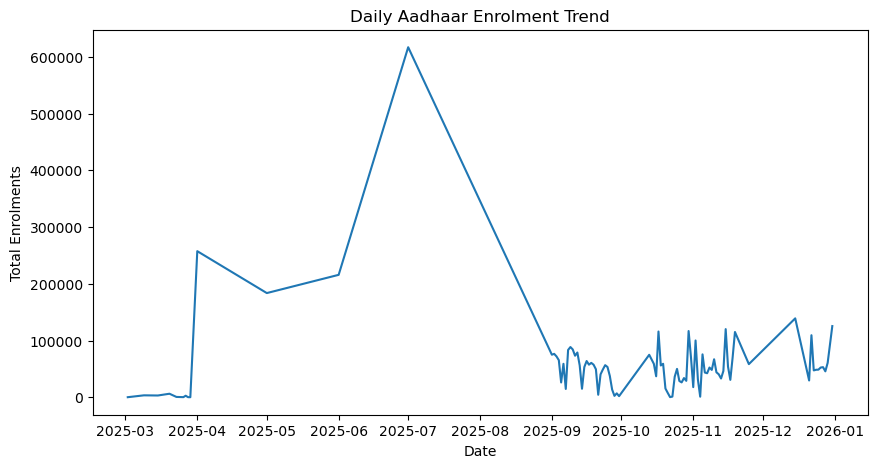

In [9]:
daily_enrol = enrol_df.groupby("date")["total_enrolment"].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_enrol)
plt.title("Daily Aadhaar Enrolment Trend")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.show()


In [10]:
state_enrol = enrol_df.groupby("state")["total_enrolment"].sum().sort_values(ascending=False)

state_enrol.head(10)

state
Uttar Pradesh     1018629
Bihar              609585
Madhya Pradesh     493970
West Bengal        375297
Maharashtra        369139
Rajasthan          348458
Gujarat            280549
Assam              230197
Karnataka          223235
Tamil Nadu         220789
Name: total_enrolment, dtype: int64

In [11]:
mean_val = daily_enrol.mean()
std_val = daily_enrol.std()

anomalies = daily_enrol[daily_enrol > mean_val + 2*std_val]
anomalies

date
2025-04-01    257438
2025-06-01    215734
2025-07-01    616868
Name: total_enrolment, dtype: int64

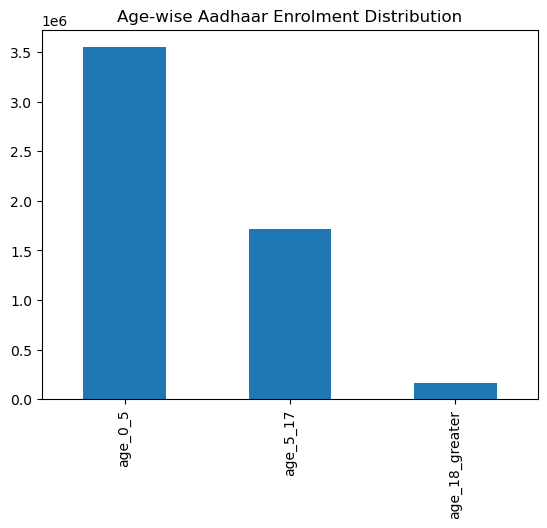

In [12]:
age_totals = enrol_df[["age_0_5","age_5_17","age_18_greater"]].sum()

age_totals.plot(kind="bar", title="Age-wise Aadhaar Enrolment Distribution")
plt.show()

In [15]:
import glob

demo_files = glob.glob("api_data_aadhar_demographic_*.csv")
demo_df = pd.concat([pd.read_csv(f) for f in demo_files], ignore_index=True)

demo_df.shape

(2071700, 6)

In [18]:
demo_df["total_demo_updates"] = (
    demo_df["demo_age_5_17"] +
    demo_df["demo_age_17_"]
)

demo_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_,total_demo_updates
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,578
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,397
2,2025-03-01,Gujarat,Rajkot,360006,65,765,830
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,338
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,830


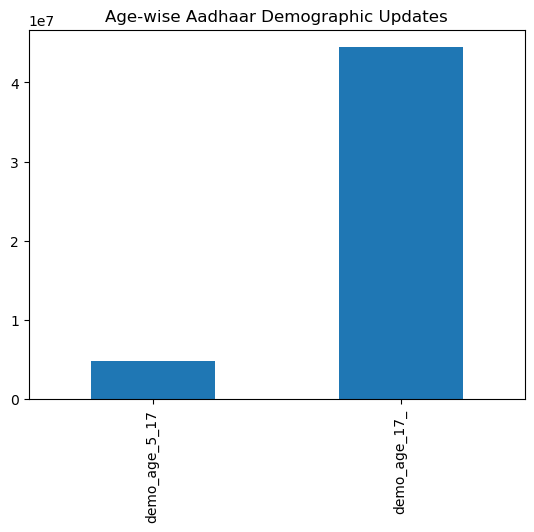

In [19]:
demo_df[["demo_age_5_17","demo_age_17_"]].sum().plot(
    kind="bar",
    title="Age-wise Aadhaar Demographic Updates"
)
plt.show()


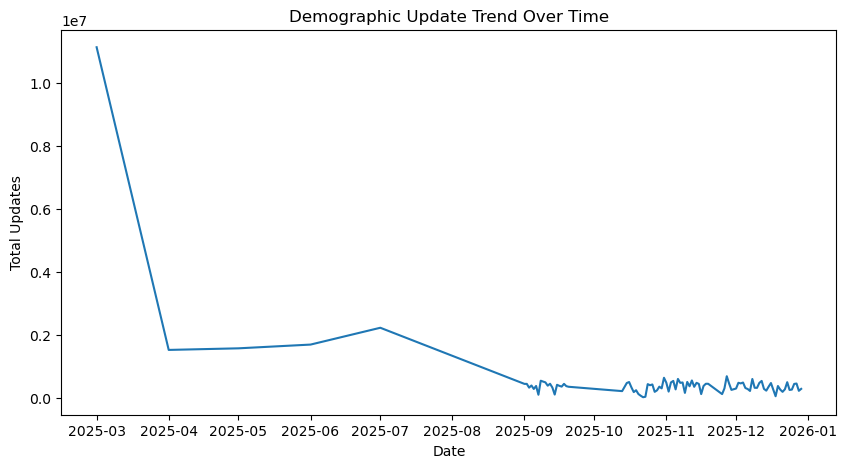

In [20]:
daily_demo = demo_df.groupby("date")["total_demo_updates"].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_demo)
plt.title("Demographic Update Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Updates")
plt.show()


In [21]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

bio_files = glob.glob("api_data_aadhar_biometric_*.csv")
bio_df = pd.concat([pd.read_csv(f) for f in bio_files], ignore_index=True)

bio_df.shape


(1861108, 6)

In [22]:
bio_df.columns


Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [23]:
bio_df["date"] = pd.to_datetime(bio_df["date"], dayfirst=True)


In [24]:
bio_df["total_bio_updates"] = (
    bio_df["bio_age_5_17"] +
    bio_df["bio_age_17_"]
)

bio_df.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_,total_bio_updates
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,857
1,2025-03-01,Bihar,Madhepura,852121,144,369,513
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,1734
3,2025-03-01,Bihar,Bhojpur,802158,256,980,1236
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,1086


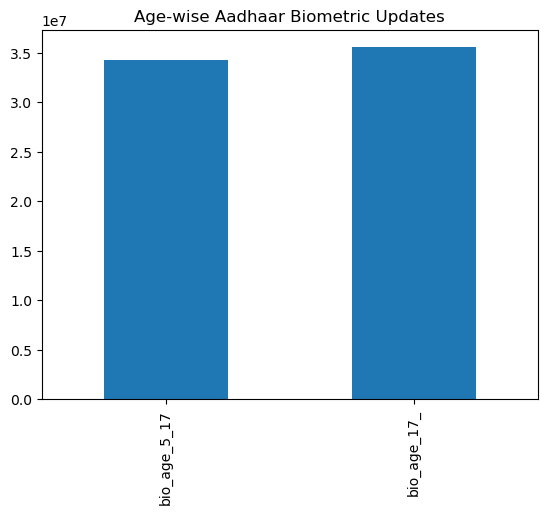

In [25]:
bio_df[["bio_age_5_17","bio_age_17_"]].sum().plot(
    kind="bar",
    title="Age-wise Aadhaar Biometric Updates"
)
plt.show()


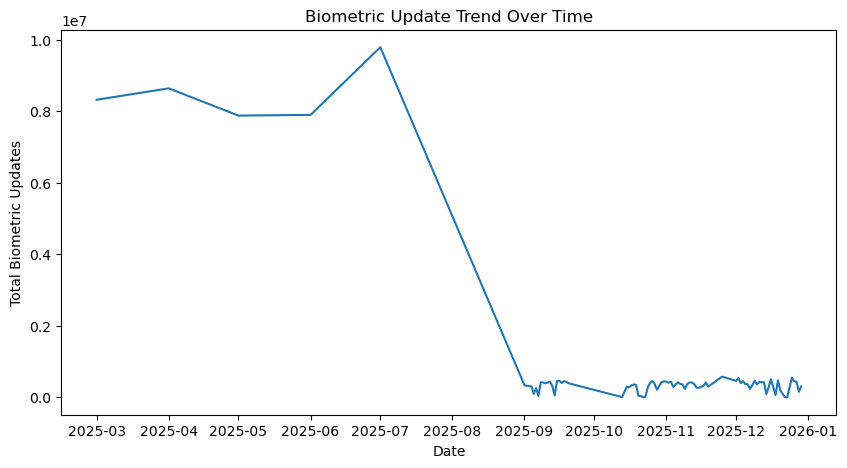

In [26]:
daily_bio = bio_df.groupby("date")["total_bio_updates"].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_bio)
plt.title("Biometric Update Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Biometric Updates")
plt.show()


In [27]:
mean_bio = daily_bio.mean()
std_bio = daily_bio.std()

bio_anomalies = daily_bio[daily_bio > mean_bio + 2*std_bio]
bio_anomalies


date
2025-03-01    8322222
2025-04-01    8641679
2025-05-01    7879956
2025-06-01    7899289
2025-07-01    9792552
Name: total_bio_updates, dtype: int64

In [28]:
enrol_state = enrol_df.groupby("state")["total_enrolment"].sum()
demo_state  = demo_df.groupby("state")["total_demo_updates"].sum()
bio_state   = bio_df.groupby("state")["total_bio_updates"].sum()

comparison = pd.concat(
    [enrol_state, demo_state, bio_state],
    axis=1
).fillna(0)

comparison.columns = ["Enrolment", "Demographic_Update", "Biometric_Update"]
comparison.head()


,Enrolment,Demographic_Update,Biometric_Update
state,,,
100000,218.0,2.0,0.0
Andaman & Nicobar Islands,114.0,1059.0,2384.0
Andaman and Nicobar Islands,397.0,6187.0,18314.0
Andhra Pradesh,127681.0,2295505.0,3714592.0
Arunachal Pradesh,4344.0,36443.0,72394.0


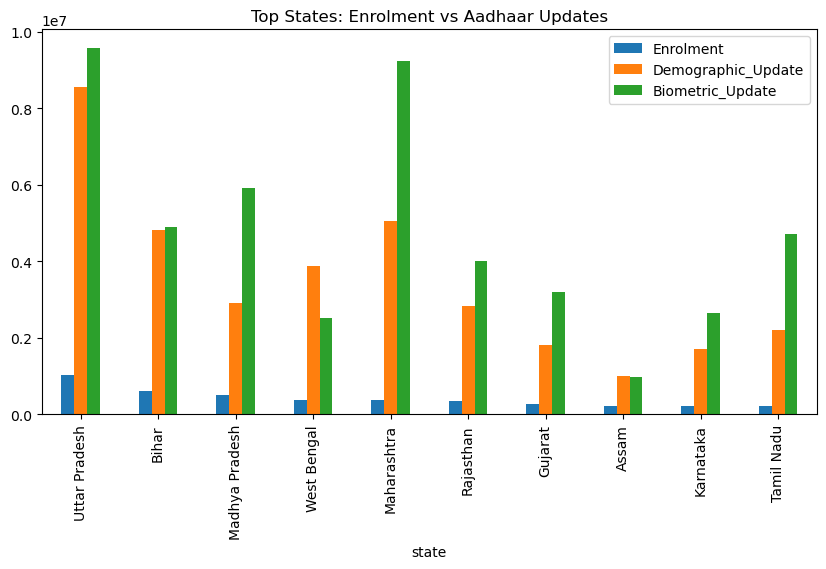

In [29]:
comparison.sort_values("Enrolment", ascending=False).head(10).plot(
    kind="bar", figsize=(10,5)
)
plt.title("Top States: Enrolment vs Aadhaar Updates")
plt.show()
